In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!python --version

Python 3.9.13


In [3]:
df = pd.read_csv("~/Downloads/Analysis/results.csv")
df.columns.values

array(['ID', 'Condition', 'Embodiment', 'Eask', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Emotional Stability',
       'Openness', 'Manipulation Check', 'Happy', 'Social', 'Emotional',
       'Capable', 'Responsive', 'Interactive', 'Reliable', 'Competent',
       'Knowledgeable', 'Fake-Natural', 'Machinelike-Humanlike',
       'Unconsious-Conscious', 'Artificial-Lifelike', 'Rigid-Elegant',
       'Dead-Alive', 'Stagnant-Lively', 'Mechanical-Organic',
       'Artificial-Lifelike 2', 'Inert-Interactive',
       'Apathetic-Responsive', 'Dislike-Like', 'Unfriendly-Friendly',
       'Unkind-Kind', 'Unpleasant-Pleasant', 'Awful-Nice',
       'Incompetent-Competent', 'Ignorant-Knowledgeable',
       'Irresponsible-Responsible', 'Unintelligent-Intelligent',
       'Foolish-Sensible', 'Gender', 'trial_1', 'trial_2', 'trial_3',
       'trial_4', 'trial_5', 'ROSAS: Warmth', 'ROSAS: Competence',
       'GS: Anthro', 'GS: Animacy', 'GS: Likeability', 'GS: PI',
       'Distance']

In [4]:
df.loc[df['Condition']==0, 'Condition'] = 'ST'
df.loc[df['Condition']==1, 'Condition'] = 'SI'
df.loc[df['Condition']==10, 'Condition'] = 'FT'
df.loc[df['Condition']==11, 'Condition'] = 'FI'


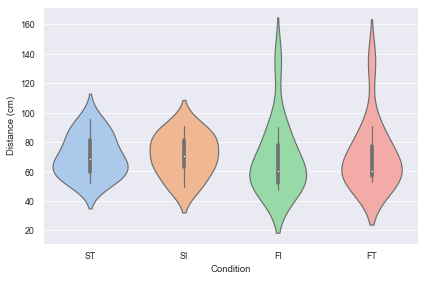

In [5]:
# df.boxplot(column='Distance', by='Condition')
sns.set_theme(context='paper', style='darkgrid',palette='pastel')
sns.violinplot(x='Condition', y='Distance', data=df)
plt.ylabel('Distance (cm)')
plt.tight_layout()
# sns.despine(offset=10, trim=True)

<AxesSubplot:xlabel='Condition', ylabel='ROSAS: Competence'>

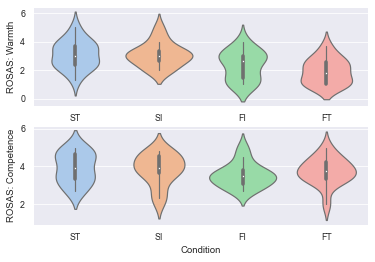

In [6]:
fig, axes = plt.subplots( 2)
sns.violinplot(x='Condition', y='ROSAS: Warmth', data=df, ax=axes[0])
sns.violinplot(x='Condition', y='ROSAS: Competence', data=df,ax=axes[1])

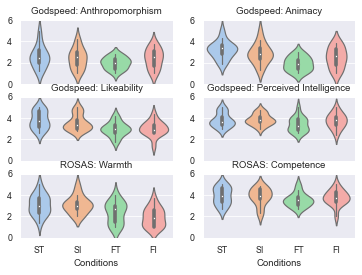

In [7]:
sns.set_theme(context='paper', style='darkgrid',palette='pastel', font_scale=1)
fig, axes = plt.subplots( 3,2)

ax = axes.flatten()[0]
sns.violinplot(x='Condition', y='GS: Anthro', data=df, ax=ax)
ax.set_title('Godspeed: Anthropomorphism')
ax = axes.flatten()[1]
sns.violinplot(x='Condition', y='GS: Animacy', data=df, ax=ax)
ax.set_title('Godspeed: Animacy')
ax = axes.flatten()[2]
sns.violinplot(x='Condition', y='GS: Likeability', data=df, ax=ax)
ax.set_title('Godspeed: Likeability')
ax = axes.flatten()[3]
sns.violinplot(x='Condition', y='GS: PI', data=df, ax=ax)
ax.set_title('Godspeed: Perceived Intelligence')
ax = axes.flatten()[4]
sns.violinplot(x='Condition', y='ROSAS: Warmth', data=df, ax=ax)
ax.set_title('ROSAS: Warmth')
ax = axes.flatten()[5]
sns.violinplot(x='Condition', y='ROSAS: Competence', data=df,ax=ax)
ax.set_title('ROSAS: Competence')

for ax in axes.flatten():
    ax.set_ylim([0,6])
    ax.set_ylabel('')
    ax.set_xlabel('')
    # ax.set_xticklabels([])
    ax.xaxis.set_ticklabels([])
axes.flatten()[5].set_xticklabels(['ST','SI','FT','FI']) 
axes.flatten()[5].set_xlabel('Conditions')
axes.flatten()[4].set_xticklabels(['ST','SI','FT','FI'])
axes.flatten()[4].set_xlabel('Conditions')
# plt.tight_layout() 
fig.savefig('violin.png', dpi=300)

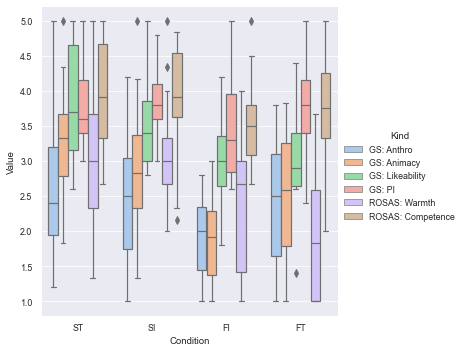

In [8]:
dk = df[['Condition', 'GS: Anthro','GS: Animacy','GS: Likeability','GS: PI','ROSAS: Warmth','ROSAS: Competence']]

tags = ['GS: Anthro','GS: Animacy','GS: Likeability','GS: PI','ROSAS: Warmth','ROSAS: Competence']

df_list = []
for t in tags:
    tmp = dk[['Condition', t]].rename(columns={t: 'Value'})
    tmp['Kind'] = t
    if 'GS' in t:
        tmp['Scale'] = 'Godspeed'
    else:
        tmp['Scale'] = 'ROSAS'
    df_list.append(tmp)

dk = pd.concat(df_list, ignore_index=True)
sns.catplot(y='Value', x='Condition', hue='Kind',data=dk, kind='box')


In [204]:
dk

,Condition,Value,Kind
0,ST,2.600000,GS: Anthro
1,SI,3.200000,GS: Anthro
2,FI,2.400000,GS: Anthro
3,FT,3.600000,GS: Anthro
4,SI,2.600000,GS: Anthro
...,...,...,...
355,SI,4.000000,ROSAS: Competence
356,SI,4.666667,ROSAS: Competence
357,ST,5.000000,ROSAS: Competence
358,FT,3.166667,ROSAS: Competence
